In [1]:
from python_workflow_definition.aiida import write_workflow_json
from python_workflow_definition.pyiron_base import load_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import load_profile
load_profile()

workflow_json_filename =  "aiida_to_pyiron_base_simple.json"

In [2]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    add_x_and_y_and_z as _add_x_and_y_and_z,
)

In [3]:
@task.pythonjob()
def pickle_node(value):
    """Handle data nodes"""
    return value

In [4]:
add_x_and_y = task.pythonjob(outputs=["x", "y", "z"])(_add_x_and_y)
add_x_and_y_and_z = task.pythonjob()(_add_x_and_y_and_z)

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
wg = WorkGraph("wg-simple")

In [6]:
helper_task1 = wg.add_task(pickle_node, name="x", value=1)
helper_task2 = wg.add_task(pickle_node, name="y", value=2)

In [7]:
add_x_and_y_task = wg.add_task(
    add_x_and_y,
    name="add_x_and_y",
    x=helper_task1.outputs.result,
    y=helper_task2.outputs.result,
)

In [8]:
add_x_and_y_and_z_task = wg.add_task(
    add_x_and_y_and_z,
    name="add_x_and_y_and_z",
    x=add_x_and_y_task.outputs.x,
    y=add_x_and_y_task.outputs.y,
    z=add_x_and_y_task.outputs.z,
)

In [9]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)


{'nodes': {'0': 1,
  '1': 2,
  '2': 'simple_workflow.add_x_and_y',
  '3': 'simple_workflow.add_x_and_y_and_z'},
 'edges': [{'target': 2,
   'targetHandle': 'x',
   'source': 0,
   'sourceHandle': None},
  {'target': 2, 'targetHandle': 'y', 'source': 1, 'sourceHandle': None},
  {'target': 3, 'targetHandle': 'x', 'source': 2, 'sourceHandle': 'x'},
  {'target': 3, 'targetHandle': 'y', 'source': 2, 'sourceHandle': 'y'},
  {'target': 3, 'targetHandle': 'z', 'source': 2, 'sourceHandle': 'z'}]}

In [10]:
from pyiron_base import Project


0it [00:00, ?it/s]

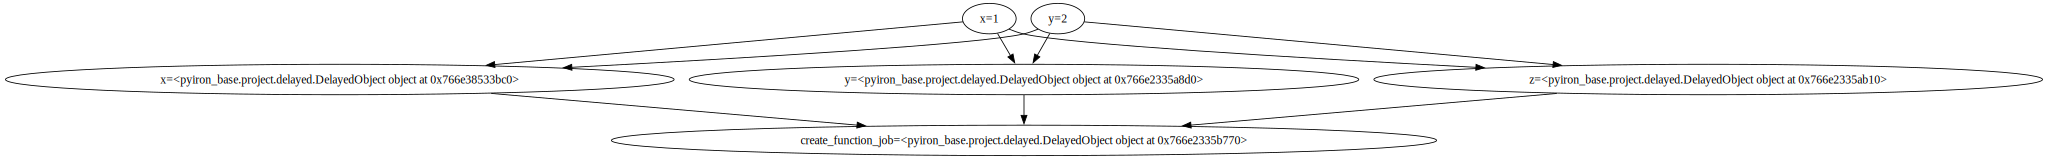

In [11]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)


delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [12]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 1
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 2


6